In [1]:
import numpy
import scipy
import matplotlib
from matplotlib import pyplot
import time

matplotlib.rcParams.update({'font.size': 18})

### Demonstration of the usefulness of subsampling.

Let's consider a setting in which we are using 0-1 loss for our empirical risk, and imagine that our error rate is $p = 0.3$ over the whole dataset of $n = 1000000$ examples. Without loss of generality, suppose that the first $30\%$ of the examples are errors and the remainder are not. We can construct the losses of these examples as follows.

In [2]:
n = 1000000;
p = 0.3;
L = numpy.hstack((numpy.ones(int(n * p)), numpy.zeros(n - int(n * p))));
L

array([1., 1., 1., ..., 0., 0., 0.])

Next, let's sample some variables $Z_k$ which are samples from the empirical risk.

In [16]:
Kmax = 100000;
Z = numpy.random.choice(L,Kmax)
Z

array([1., 0., 1., ..., 1., 1., 1.])

Next, we compute the partial averages
$$
    S_K = \frac{1}{K} \sum_{k=1}^K Z_k.
$$

In [4]:
S = numpy.cumsum(Z) / numpy.arange(1,(Kmax+1))

Now we can plot this average and see how it changes as we increase $K$.

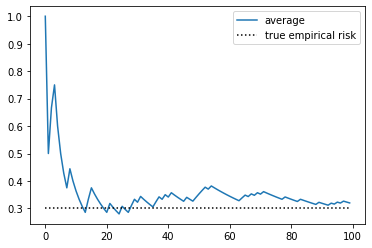

true  empirical  risk: 0.3
approx empirical risk: 0.32
error                : 0.020000000000000018


In [5]:
Kplot = 100;
pyplot.plot(numpy.arange(Kplot), S[0:Kplot], label="average");
pyplot.plot(numpy.arange(Kplot), p * numpy.ones(Kplot), "k:", label="true empirical risk");
pyplot.legend();
pyplot.show();

# what's the error at the end?
print(f"true  empirical  risk: {p}");
print(f"approx empirical risk: {S[Kplot-1]}");
print(f"error                : {abs(S[Kplot-1]-p)}");

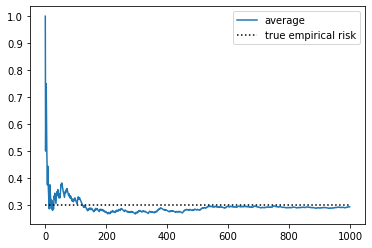

true  empirical  risk: 0.3
approx empirical risk: 0.293
error                : 0.007000000000000006


In [6]:
Kplot = 1000;
pyplot.plot(numpy.arange(Kplot), S[0:Kplot], label="average");
pyplot.plot(numpy.arange(Kplot), p * numpy.ones(Kplot), "k:", label="true empirical risk");
pyplot.legend();
pyplot.show();

# what's the error at the end?
print(f"true  empirical  risk: {p}");
print(f"approx empirical risk: {S[Kplot-1]}");
print(f"error                : {abs(S[Kplot-1]-p)}");

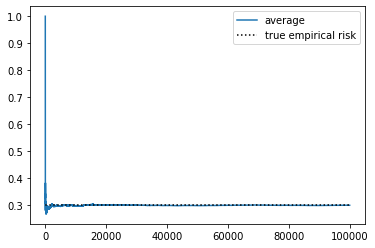

true  empirical  risk: 0.3
approx empirical risk: 0.29897
error                : 0.0010299999999999754


In [7]:
Kplot = Kmax;
pyplot.plot(numpy.arange(Kplot), S[0:Kplot], label="average");
pyplot.plot(numpy.arange(Kplot), p * numpy.ones(Kplot), "k:", label="true empirical risk");
pyplot.legend();
pyplot.show();

# what's the error at the end?
print(f"true  empirical  risk: {p}");
print(f"approx empirical risk: {S[Kplot-1]}");
print(f"error                : {abs(S[Kplot-1]-p)}");

## How long does it take to do subsampling for empirical risk?

Let's choose some $x$ and $y$ completely at random, and evaluate the hypothesis
$$h_w(x) = \operatorname{sign}(x^T w).$$

In [8]:
n = 1000000;
d = 256;
Xs = [numpy.random.randn(d) for i in range(n)];
w = numpy.random.randn(d);
Ys = [numpy.sign(numpy.random.choice([-1.0,0.9,1.0,1.1])*numpy.sign(numpy.dot(Xs[i],w))) for i in range(n)];

# error should be about 25%

In [9]:
def total_error(Xs, Ys, w):
    n = len(Ys)
    return numpy.mean([numpy.sign(numpy.dot(Xs[i],w)) != Ys[i] for i in range(n)])

In [10]:
t = time.time()
print(f"total error:  {total_error(Xs, Ys, w)}")
print(f"time elapsed: {time.time()-t} seconds")

total error:  0.25015
time elapsed: 2.2387120723724365 seconds


In [11]:
def estimate_error(Xs, Ys, w, K):
    n = len(Ys)
    return numpy.mean([numpy.sign(numpy.dot(Xs[i],w)) != Ys[i] for i in numpy.random.randint(n, size=K)])

In [27]:
t = time.time()
print(f"total error:  {estimate_error(Xs, Ys, w, 10)}")
print(f"time elapsed: {time.time()-t} seconds")

total error:  0.1
time elapsed: 0.0006699562072753906 seconds


In [20]:
t = time.time()
print(f"total error:  {estimate_error(Xs, Ys, w, 1000)}")
print(f"time elapsed: {time.time()-t} seconds")

total error:  0.248
time elapsed: 0.006220102310180664 seconds


In [13]:
t = time.time()
print(f"total error:  {estimate_error(Xs, Ys, w, 10000)}")
print(f"time elapsed: {time.time()-t} seconds")

total error:  0.2511
time elapsed: 0.037470102310180664 seconds


In [14]:
t = time.time()
print(f"total error:  {estimate_error(Xs, Ys, w, 100000)}")
print(f"time elapsed: {time.time()-t} seconds")

total error:  0.252
time elapsed: 0.33864903450012207 seconds


In [15]:
t = time.time()
print(f"total error:  {estimate_error(Xs, Ys, w, 1000000)}")
print(f"time elapsed: {time.time()-t} seconds")

total error:  0.250141
time elapsed: 3.230146884918213 seconds
